
----- Training Models for All Features -----

Sim XGB Boosting Ensemble (All Features) Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


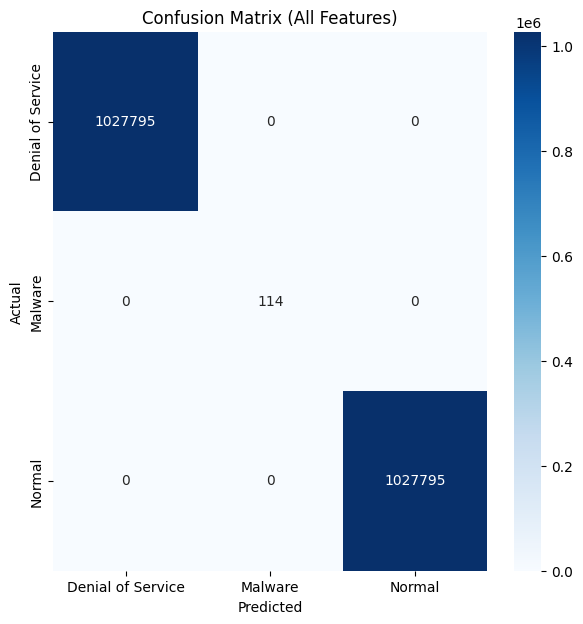


----- Training Models for IG Top 5 Features -----

Sim XGB Boosting Ensemble (IG Top 5 Features) Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


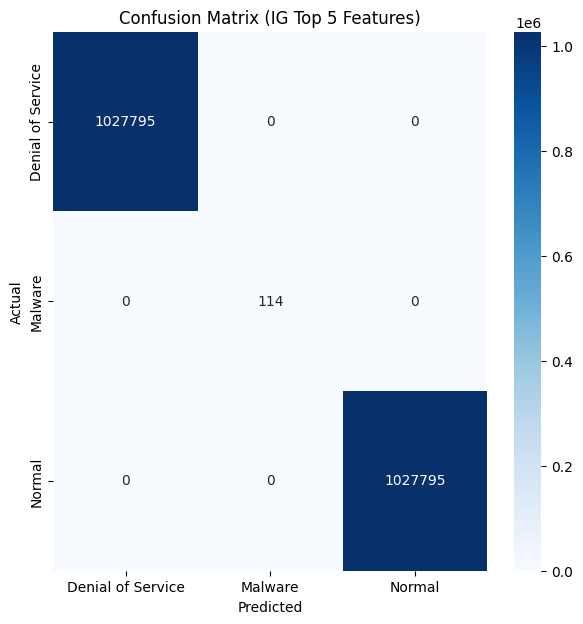


----- Training Models for IG Top 10 Features -----

Sim XGB Boosting Ensemble (IG Top 10 Features) Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


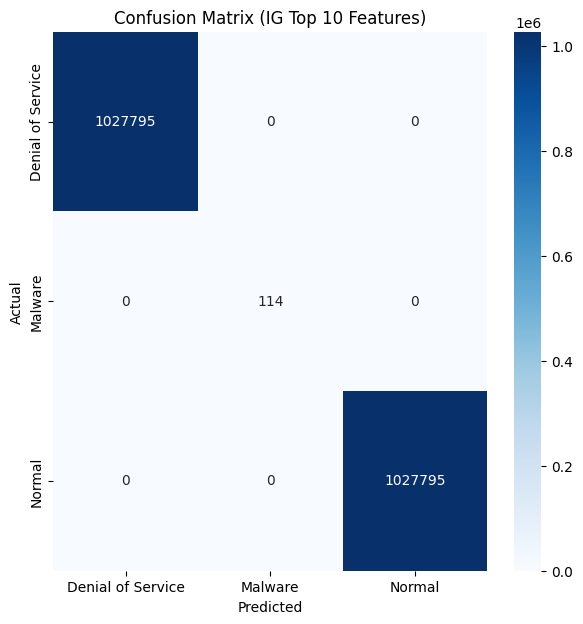


----- Training Models for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Sim XGB Boosting Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.9999299510046193
Precision: 0.99987450050781
Recall: 0.9999299510046193
F1 Score: 0.9999022248149602


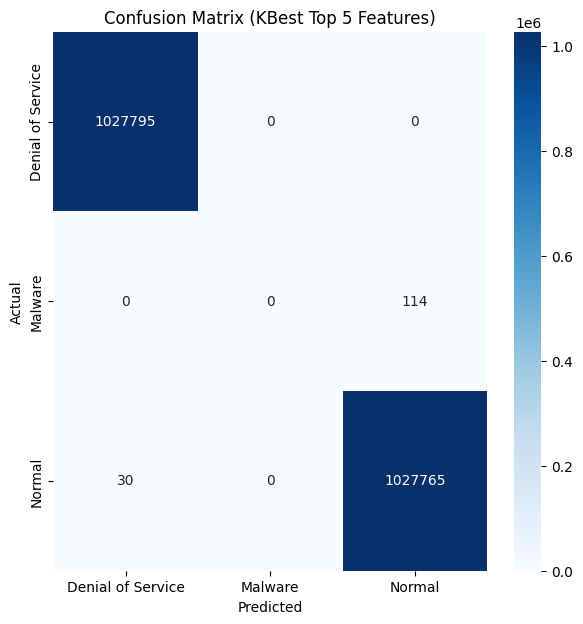


----- Training Models for KBest Top 10 Features -----

Sim XGB Boosting Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.9999854064592957
Precision: 0.9999854068852498
Recall: 0.9999854064592957
F1 Score: 0.9999854064592927


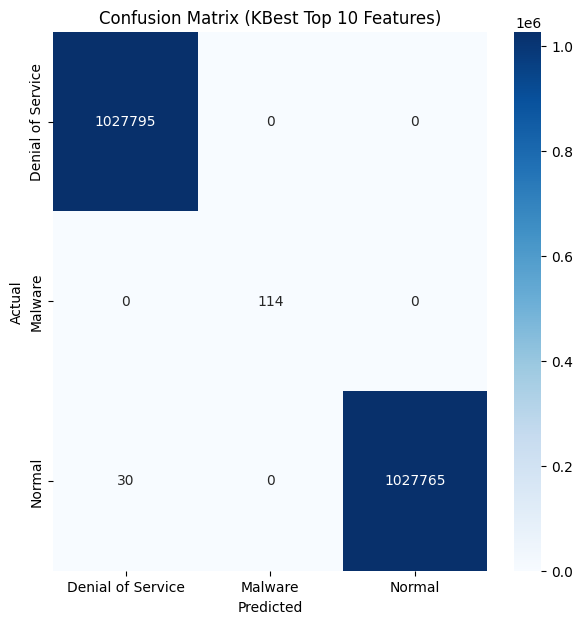

In [1]:
import time
import xgboost as xgb
import sys
sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from Simargl import data_preprocessing, evaluate_model, plot_confusion_matrix


# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train , y_test) in datasets.items():
    print(f"\n----- Training Models for {name} -----")

    start_time = time.time()

    xgb_model = xgb.XGBClassifier(random_state=42, learning_rate=0.01, objective='multi:softmax')

    xgb_model.fit(X_tr, y_train)
    train_end_time = time.time()

    y_pred_encoded = xgb_model.predict(X_te)
    pred_end_time = time.time()

    metrics = evaluate_model(y_test, y_pred_encoded, f"Sim XGB Boosting Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, y_pred_encoded, le.classes_, f"Confusion Matrix ({name})")


In [2]:

# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("Sim_XGB_ensemble_classifier_evaluation_summary.csv", index=False)



Summary of Results:
                                               Model  Accuracy  Precision  \
0           Sim XGB Boosting Ensemble (All Features)  1.000000   1.000000   
1      Sim XGB Boosting Ensemble (IG Top 5 Features)  1.000000   1.000000   
2     Sim XGB Boosting Ensemble (IG Top 10 Features)  1.000000   1.000000   
3   Sim XGB Boosting Ensemble (KBest Top 5 Features)  0.999930   0.999875   
4  Sim XGB Boosting Ensemble (KBest Top 10 Features)  0.999985   0.999985   

     Recall  F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  1.000000  1.000000         172.574825             0.604261      173.179086  
1  1.000000  1.000000         283.730596             0.923671      284.654266  
2  1.000000  1.000000         290.788623             0.699351      291.487974  
3  0.999930  0.999902         278.542934             0.978403      279.521337  
4  0.999985  0.999985         288.113090             0.946796      289.059886  
